In [1]:
import pandas as pd 
housing = pd.read_csv("housing.csv")

In [2]:
print(housing.head(10))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0   

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
print(housing["ocean_proximity"].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [5]:
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

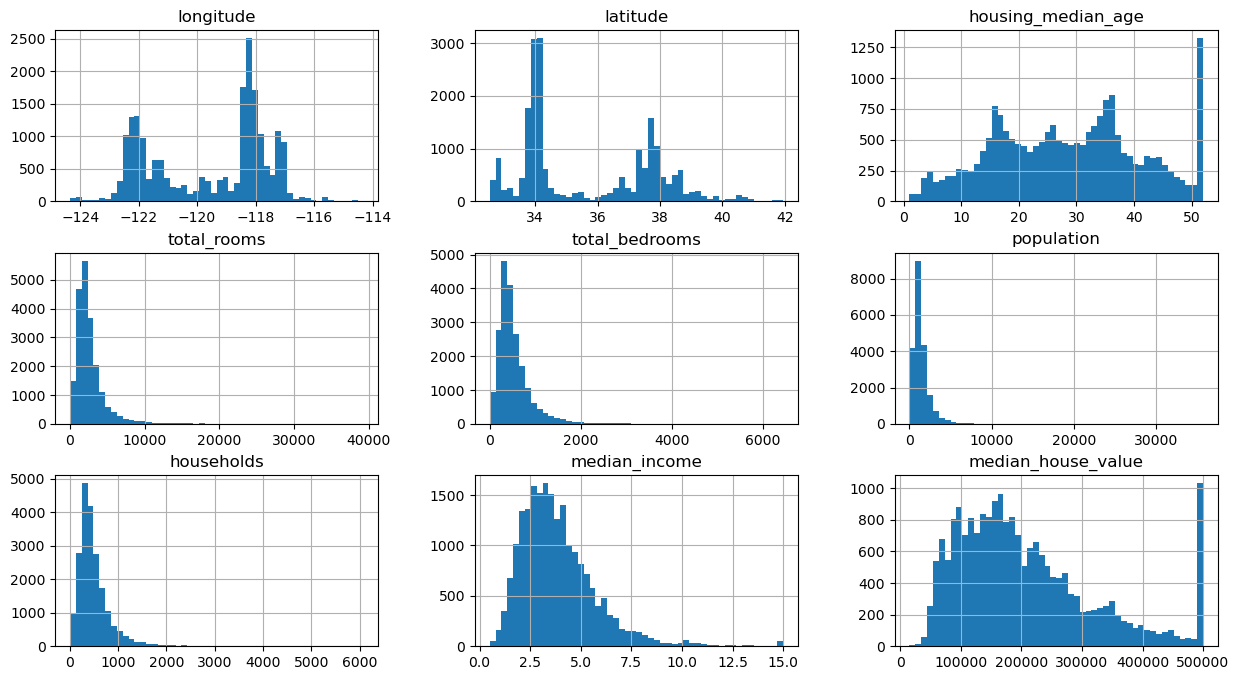

In [6]:
housing.hist(bins=50, figsize=(15, 8))

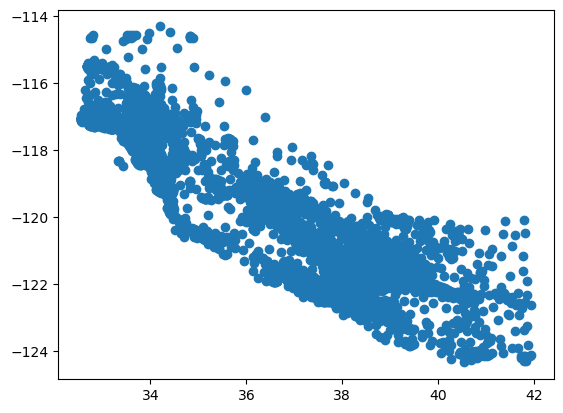

In [7]:
import matplotlib.pyplot as plt
plt.scatter(housing["latitude"].values, housing["longitude"])
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

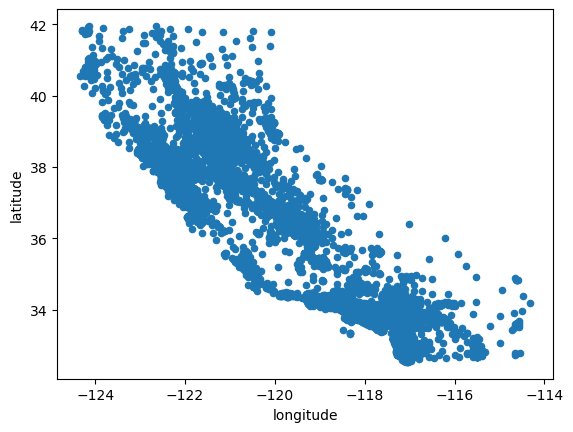

In [8]:

housing.plot(kind="scatter", x="longitude", y="latitude")

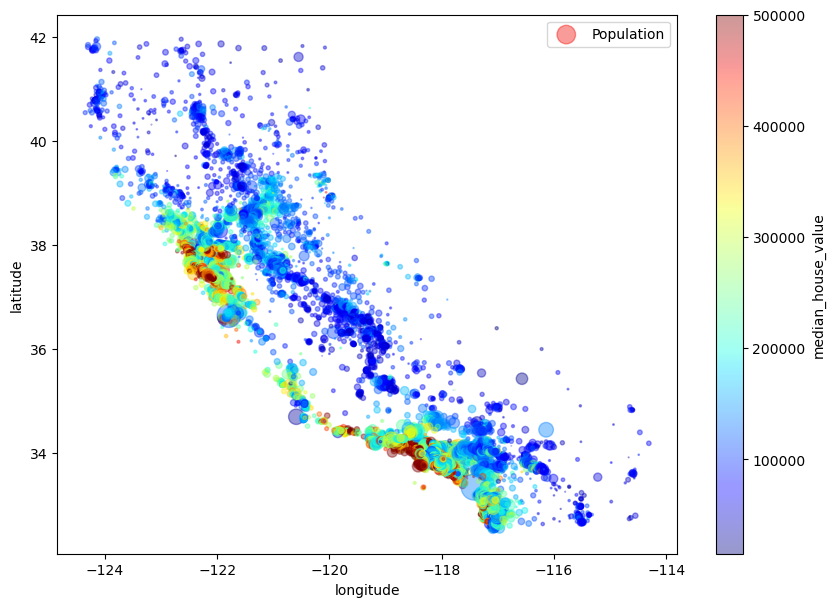

In [9]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10,7), label="Population")
plt.legend()

In [10]:
corr_matrix = housing.corr()
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

/tmp/ipykernel_2544/2218404913.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [11]:
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


<Axes: xlabel='median_income', ylabel='median_house_value'>

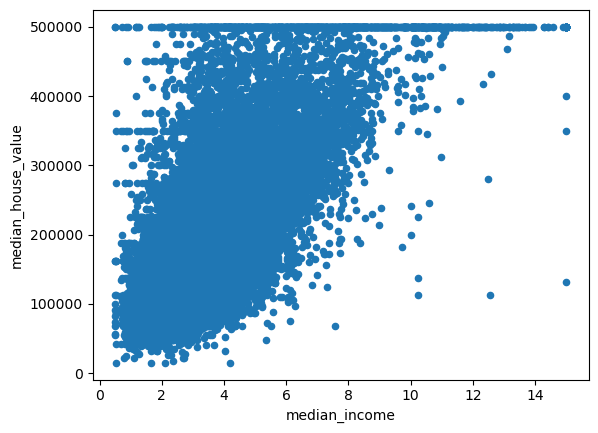

In [12]:

housing.plot(kind="scatter", y="median_house_value", x="median_income")

In [13]:
housing = housing.drop(["total_bedrooms"], axis=1)

In [14]:
print(housing.keys())

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')


# Onehot

In [16]:
X = housing.drop(["median_house_value"], axis=1)
y = housing["median_house_value"].copy()

X_onehot = pd.get_dummies(housing.drop(["median_house_value"], axis=1))
print(X_onehot.keys())

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')


# Skalierung

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_onehot)
X_scaled = scaler.transform(X_onehot)


# Train - Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2)

In [19]:
X_train_pandas = pd.DataFrame(X_train, columns=X_onehot.columns)
X_test_pandas = pd.DataFrame(X_test, columns=X_onehot.columns)

# Lineare Regression

In [20]:
from sklearn.linear_model import LinearRegression as lin_reg

model = lin_reg()
model.fit(X_train_pandas, y_train)

print("train data:")
print(y_train[0:4].values)
print(model.predict(X_train[0:4]))

print("test data:")
print(y_test[0:4].values)
print(model.predict(X_test[0:4]))

train data:
[245600. 164100. 137500. 161200.]
[238193.0250906  119947.41827692 213776.80772159 163367.67397259]
test data:
[323300. 189700. 290900. 500001.]
[328732.88588319 236904.81943877 279063.60798675 355530.65325748]


/home/christoph/miniconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/christoph/miniconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np
y_train_predict = model.predict(X_train_pandas)
mse_train = mean_squared_error(y_train, y_train_predict)
rmse_train = np.sqrt(mse_train)
print("train dataset: ", rmse_train)

y_test_predict = model.predict(X_test_pandas)
mse = mean_squared_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
print("test dataset: ", rmse)

train dataset:  69303.72624072802
test dataset:  67557.51085126416


# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeRegressor as tree_reg

model = tree_reg()
model.fit(X_train_pandas, y_train)

print("train data:")
print(y_train[0:4].values)
print(model.predict(X_train[0:4]))

print("test data:")
print(y_test[0:4].values)
print(model.predict(X_test[0:4]))

train data:
[245600. 164100. 137500. 161200.]
[245600. 164100. 137500. 161200.]
test data:
[323300. 189700. 290900. 500001.]
[284200. 145500. 265600. 500001.]


/home/christoph/miniconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/home/christoph/miniconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [26]:
from sklearn.metrics import mean_squared_error
import numpy as np
y_train_predict = model.predict(X_train_pandas)
mse_train = mean_squared_error(y_train, y_train_predict)
rmse_train = np.sqrt(mse_train)
print("train dataset: ", rmse_train)

y_test_predict = model.predict(X_test_pandas)
mse = mean_squared_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
print("test dataset: ", rmse)

train dataset:  0.0
test dataset:  68785.67103064522


In [29]:
from sklearn.model_selection import cross_val_score
negative_mse = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-negative_mse)
print(tree_rmse_scores)

[71454.45916067 67544.09588663 70229.5879813  67699.70045427
 69555.95831888 74084.36331227 68309.28343257 69855.06508757
 70245.49108642 71163.34500884]


# Random Forrest

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators": [3,10,30], "max_features": [2,4,6,8,10,12]}
grid_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, refit=True, scoring="neg_mean_squared_error")
grid_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8, 10, 12],
                         'n_estimators': [3, 10, 30]},
             scoring='neg_mean_squared_error')

In [38]:
print(grid_forest.best_params_)
print(grid_forest.best_estimator_)
print(np.sqrt(-grid_forest.best_score_))

y_test_predict = grid_forest.predict(X_test)
mse = mean_squared_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
print("test dataset: ", rmse)

{'max_features': 6, 'n_estimators': 30}
RandomForestRegressor(max_features=6, n_estimators=30)
49825.93554550897
test dataset:  48709.11460139625


In [41]:
mean_scores = grid_forest.cv_results_["mean_test_score"]
params = grid_forest.cv_results_["params"]
for i in np.arange(len(params)):
    print(np.sqrt(-mean_scores[i]), params[i])

63325.83025104801 {'max_features': 2, 'n_estimators': 3}
53880.58082861116 {'max_features': 2, 'n_estimators': 10}
51540.69103185227 {'max_features': 2, 'n_estimators': 30}
59740.47406799899 {'max_features': 4, 'n_estimators': 3}
52135.54375879267 {'max_features': 4, 'n_estimators': 10}
49926.35384693108 {'max_features': 4, 'n_estimators': 30}
58231.36965820358 {'max_features': 6, 'n_estimators': 3}
52369.26801741393 {'max_features': 6, 'n_estimators': 10}
49825.93554550897 {'max_features': 6, 'n_estimators': 30}
58109.320474348635 {'max_features': 8, 'n_estimators': 3}
51279.79690078275 {'max_features': 8, 'n_estimators': 10}
49876.98411189182 {'max_features': 8, 'n_estimators': 30}
58596.332612996644 {'max_features': 10, 'n_estimators': 3}
51926.24244304781 {'max_features': 10, 'n_estimators': 10}
50116.906188240435 {'max_features': 10, 'n_estimators': 30}
58610.38323013843 {'max_features': 12, 'n_estimators': 3}
52359.53068130778 {'max_features': 12, 'n_estimators': 10}
50442.502701

In [44]:
feature_importances = grid_forest.best_estimator_.feature_importances_
feature_names = X_train_pandas.keys()
for i in np.arange(len(feature_importances)):
    print(feature_importances[i], feature_names[i])

0.12527609335635947 longitude
0.12279802693152983 latitude
0.048425972380423996 housing_median_age
0.04061554015580855 total_rooms
0.04300529611049351 population
0.0365079114186186 households
0.42378082998276745 median_income
0.015459975849003285 ocean_proximity_<1H OCEAN
0.13411975918245325 ocean_proximity_INLAND
0.00010884562422070633 ocean_proximity_ISLAND
0.00273715155522463 ocean_proximity_NEAR BAY
0.007164597453096553 ocean_proximity_NEAR OCEAN


In [46]:
final_model = grid_forest.best_estimator_
y_test_predict = final_model.predict(X_test)
mse = mean_squared_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
print("test dataset: ", rmse)

test dataset:  48709.11460139625


In [47]:
from scipy import stats
confidence = 0.95
squared_errors = (y_test_predict - y_test)**2
conf_intervall_95 = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

print(conf_intervall_95)

[46606.62372588 50724.53366349]
